# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

weather_data = {
    'City': [],
    'Cloudiness': [],
    'Country': [],
    'Date': [],
    'Humidity': [],
    'Latitude': [],
    'Longitude': [],
    'Maximum Temperature': [],
    'Wind Speed': []
}

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

record = 0
set = 1

for city in cities:
    response = requests.get(f'{url}appid={weather_api_key}&units={units}&q={city}').json()
    time.sleep(0.5)

    if record < 50:
        record += 1
    
    else:
        set += 1
        record = 1    
    
    try:
        weather_data['City'].append(response['name'])
        weather_data['Cloudiness'].append(response['clouds']['all'])
        weather_data['Country'].append(response['sys']['country'])
        weather_data['Date'].append(response['dt'])
        weather_data['Humidity'].append(response['main']['humidity'])
        weather_data['Latitude'].append(response['coord']['lat'])
        weather_data['Longitude'].append(response['coord']['lon'])
        weather_data['Maximum Temperature'].append(response['main']['temp_max'])
        weather_data['Wind Speed'].append(response['wind']['speed'])
            
        print(f'Processing Record {record} of Set {set} | {city}')
        
    except KeyError:
        print(f'City not found. Skipping...')
          
print(f'-----------------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vao
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | te anau
City not found. Skipping...
Processing Record 5 of Set 1 | isiro
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | bull savanna
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | port macquarie
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | dongying
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | bwanga
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | takaka
Processing Record 24 of Set 1

Processing Record 5 of Set 5 | hay river
City not found. Skipping...
Processing Record 7 of Set 5 | menongue
Processing Record 8 of Set 5 | bundaberg
Processing Record 9 of Set 5 | kavieng
Processing Record 10 of Set 5 | fortuna
Processing Record 11 of Set 5 | san rafael
Processing Record 12 of Set 5 | rawson
Processing Record 13 of Set 5 | ust-kuyga
Processing Record 14 of Set 5 | ardakan
Processing Record 15 of Set 5 | jiaojiang
Processing Record 16 of Set 5 | llaillay
Processing Record 17 of Set 5 | pacov
Processing Record 18 of Set 5 | lyubinskiy
City not found. Skipping...
Processing Record 20 of Set 5 | faya
Processing Record 21 of Set 5 | kailua
Processing Record 22 of Set 5 | kewanee
Processing Record 23 of Set 5 | srandakan
Processing Record 24 of Set 5 | camana
Processing Record 25 of Set 5 | camacha
City not found. Skipping...
Processing Record 27 of Set 5 | krabi
Processing Record 28 of Set 5 | zhigansk
Processing Record 29 of Set 5 | kovdor
Processing Record 30 of Set 5 | 

Processing Record 11 of Set 9 | santa fe
Processing Record 12 of Set 9 | muzhi
Processing Record 13 of Set 9 | gorodovikovsk
Processing Record 14 of Set 9 | velasco ibarra
Processing Record 15 of Set 9 | atambua
Processing Record 16 of Set 9 | tezu
City not found. Skipping...
Processing Record 18 of Set 9 | san quintin
Processing Record 19 of Set 9 | kimbe
Processing Record 20 of Set 9 | lorengau
Processing Record 21 of Set 9 | phonhong
Processing Record 22 of Set 9 | gondanglegi
Processing Record 23 of Set 9 | lakes entrance
Processing Record 24 of Set 9 | raudeberg
Processing Record 25 of Set 9 | cutervo
Processing Record 26 of Set 9 | guozhen
Processing Record 27 of Set 9 | leningradskiy
Processing Record 28 of Set 9 | laguna
Processing Record 29 of Set 9 | tres arroyos
City not found. Skipping...
Processing Record 31 of Set 9 | ampanihy
Processing Record 32 of Set 9 | atar
Processing Record 33 of Set 9 | hithadhoo
Processing Record 34 of Set 9 | carndonagh
Processing Record 35 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(weather_data)

weather_df.count()

City                   558
Cloudiness             558
Country                558
Date                   558
Humidity               558
Latitude               558
Longitude              558
Maximum Temperature    558
Wind Speed             558
dtype: int64

In [5]:
weather_df.to_csv
weather_df.to_csv(output_data_file, index = False)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,Vao,24,NC,1579914348,80,-22.67,167.48,77.23,18.92
1,East London,79,ZA,1579914204,76,-33.02,27.91,76.03,4.05
2,Te Anau,90,NZ,1579914349,87,-45.42,167.72,61.81,7.18
3,Isiro,100,CD,1579914350,36,2.77,27.62,64.04,3.44
4,Ushuaia,75,AR,1579914351,71,-54.80,-68.30,51.80,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

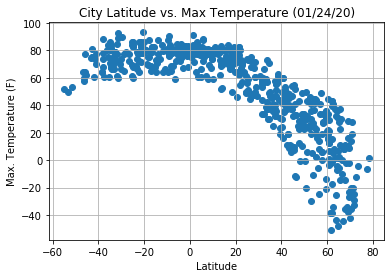

In [6]:
plt.scatter(weather_df["Latitude"], weather_df["Maximum Temperature"])

plt.title("City Latitude vs. Max Temperature (01/24/20)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

plt.show()

#### Latitude vs. Humidity Plot

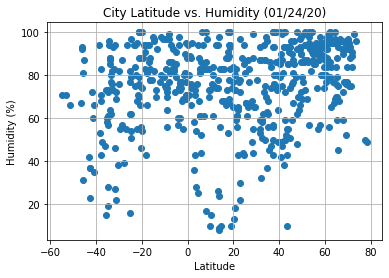

In [7]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])

plt.title("City Latitude vs. Humidity (01/24/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

plt.show()

#### Latitude vs. Cloudiness Plot

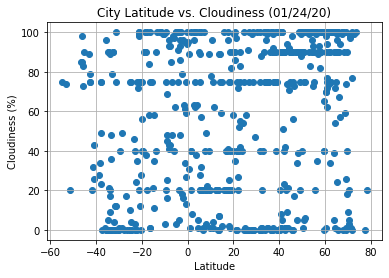

In [8]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"])

plt.title("City Latitude vs. Cloudiness (01/24/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

plt.show()

#### Latitude vs. Wind Speed Plot

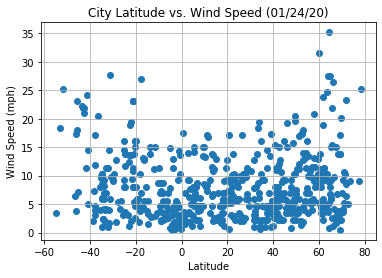

In [9]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])

plt.title("City Latitude vs. Wind Speed (01/24/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df['Latitude'] >= 0]
southern_hemisphere = weather_df.loc[weather_df['Latitude'] < 0]

northern_temperature = northern_hemisphere['Maximum Temperature']
southern_temperature = southern_hemisphere['Maximum Temperature']
northern_latitude = northern_hemisphere['Latitude']
southern_latitude = southern_hemisphere['Latitude']
northern_humidity = northern_hemisphere['Humidity']
southern_humidity = southern_hemisphere['Humidity']
northern_cloudiness = northern_hemisphere['Cloudiness']
southern_cloudiness = southern_hemisphere['Cloudiness']
northern_wind = northern_hemisphere['Wind Speed']
southern_wind = southern_hemisphere['Wind Speed']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8534643534602645


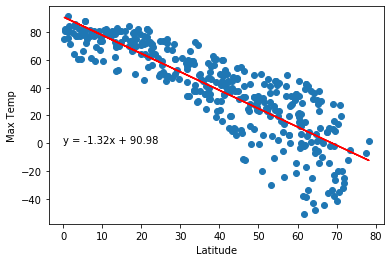

In [11]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_temperature)
regress_values = northern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(northern_latitude, northern_temperature)
plt.plot(northern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(0,0))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/northern_hemisphere_max_temp_vs_latitude_linear_regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.38248939601112386


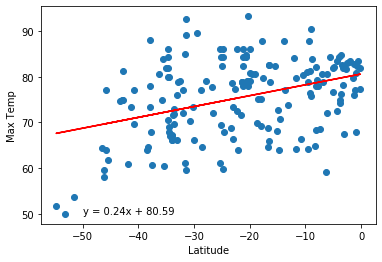

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_temperature)
regress_values = southern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(southern_latitude, southern_temperature)
plt.plot(southern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(-50,50))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/southern_hemisphere_max_temp_vs_latitude_linear_regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3214585734350499


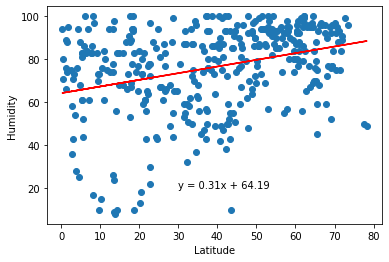

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_humidity)
regress_values = northern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(northern_latitude, northern_humidity)
plt.plot(northern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(30,20))
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/northern_hemisphere_humidity_vs_latitude_linear_regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.33382640289497945


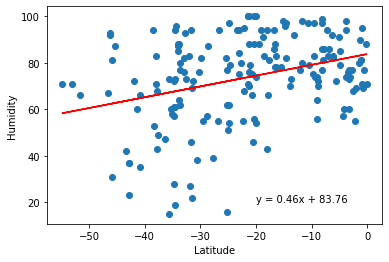

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_humidity)
regress_values = southern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(southern_latitude, southern_humidity)
plt.plot(southern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(-20,20))
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/southern_hemisphere_humidity_vs_latitude_linear_regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25171444076525534


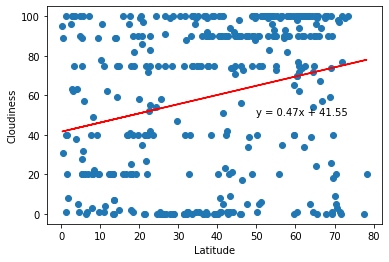

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_cloudiness)
regress_values = northern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(northern_latitude, northern_cloudiness)
plt.plot(northern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(50,50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/northern_hemisphere_cloudiness_vs_latitude_linear_regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2376610337330057


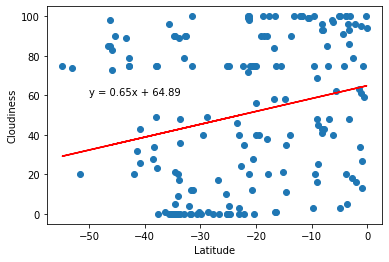

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_cloudiness)
regress_values = southern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(southern_latitude, southern_cloudiness)
plt.plot(southern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(-50,60))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/southern_hemisphere_cloudiness_vs_latitude_linear_regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.21696601418898454


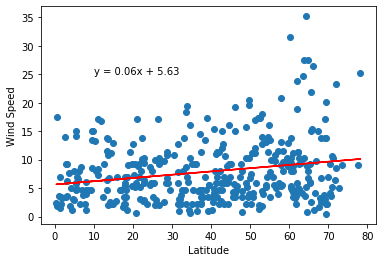

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_wind)
regress_values = northern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(northern_latitude, northern_wind)
plt.plot(northern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(10,25))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/northern_hemisphere_wind_speed_vs_latitude_linear_regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.33339885733419466


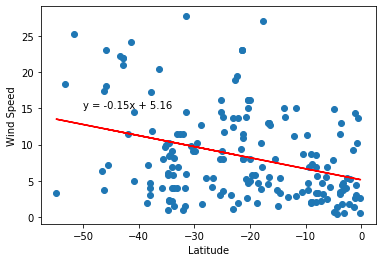

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_wind)
regress_values = southern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(southern_latitude, southern_wind)
plt.plot(southern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(-50,15))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/southern_hemisphere_wind_speed_vs_latitude_linear_regression.png')